In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Load the dataset
file_path = 'Disease11111.csv'  # Update with the correct path
dataset = pd.read_csv(file_path)

In [ ]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(dataset.head())


First 5 rows of the dataset:
        disease                                           symptoms  \
0           flu  fever,cough,sore throat,runny or stuffy nose,m...   
1    bronchitis  cough,mucus production,shortness of breath,che...   
2     pneumonia  fever,cough,shortness of breath,chest pain,fat...   
3  heart attack  chest pain,shortness of breath,nausea,vomiting...   
4        stroke  sudden weakness,numbness on one side of the bo...   

                                               cures  \
0           over-the-counter medications,rest,fluids   
1  antibiotics,over-the-counter medications,rest,...   
2  antibiotics,over-the-counter medications,rest,...   
3                         emergency medical services   
4                         emergency medical services   

                        doctor     risk level  
0    family doctor,urgent care      low (0.1%  
1  family doctor,pulmonologist      low (0.5%  
2  family doctor,pulmonologist  moderate (1%)  
3                 car

In [ ]:
# Summary statistics
print("\nDataset Summary:")
print(dataset.describe(include='all'))


Dataset Summary:
          disease                                           symptoms  \
count         396                                                396   
unique         88                                                 79   
top     pneumonia  memory loss,confusion,difficulty thinking,chan...   
freq           12                                                 16   

              cures                     doctor risk level  
count           396                        396        396  
unique           57                         41         21  
top     antibiotics  family doctor,urgent care     varies  
freq             36                         44        112  


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
disease       0
symptoms      0
cures         0
doctor        0
risk level    0
dtype: int64


In [ ]:
# Convert all text to lowercase
dataset['symptoms'] = dataset['symptoms'].str.lower()

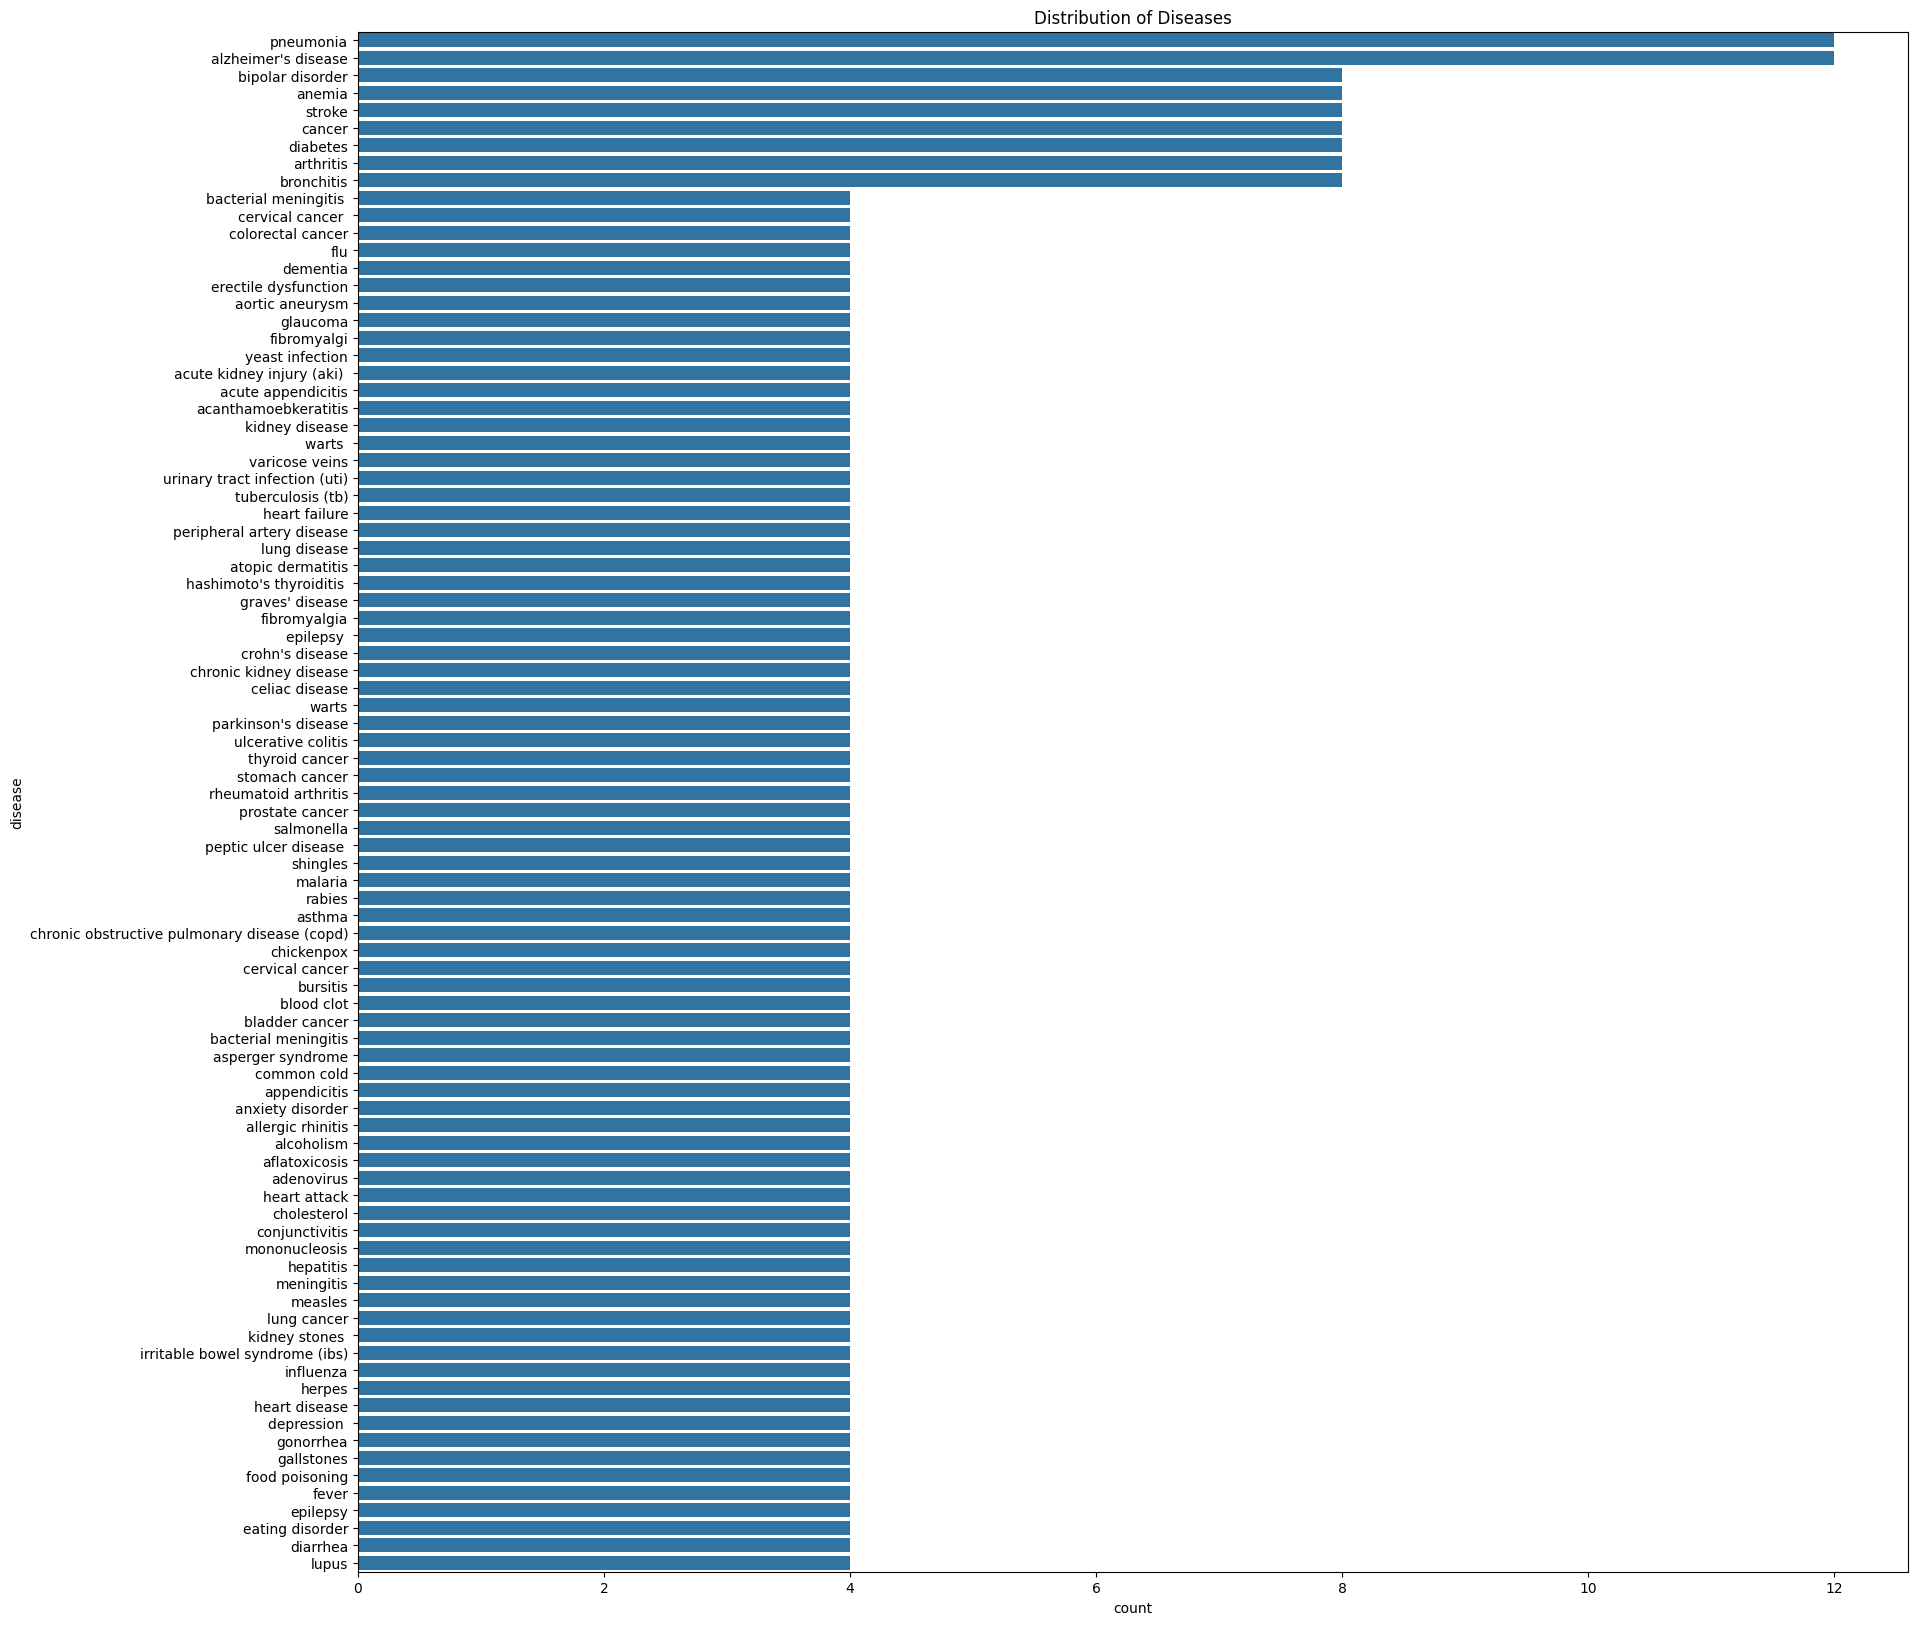

In [ ]:
# Plot the distribution of diseases
plt.figure(figsize=(20, 20))
sns.countplot(y=dataset['disease'], order=dataset['disease'].value_counts().index)
plt.title('Distribution of Diseases')
plt.show()

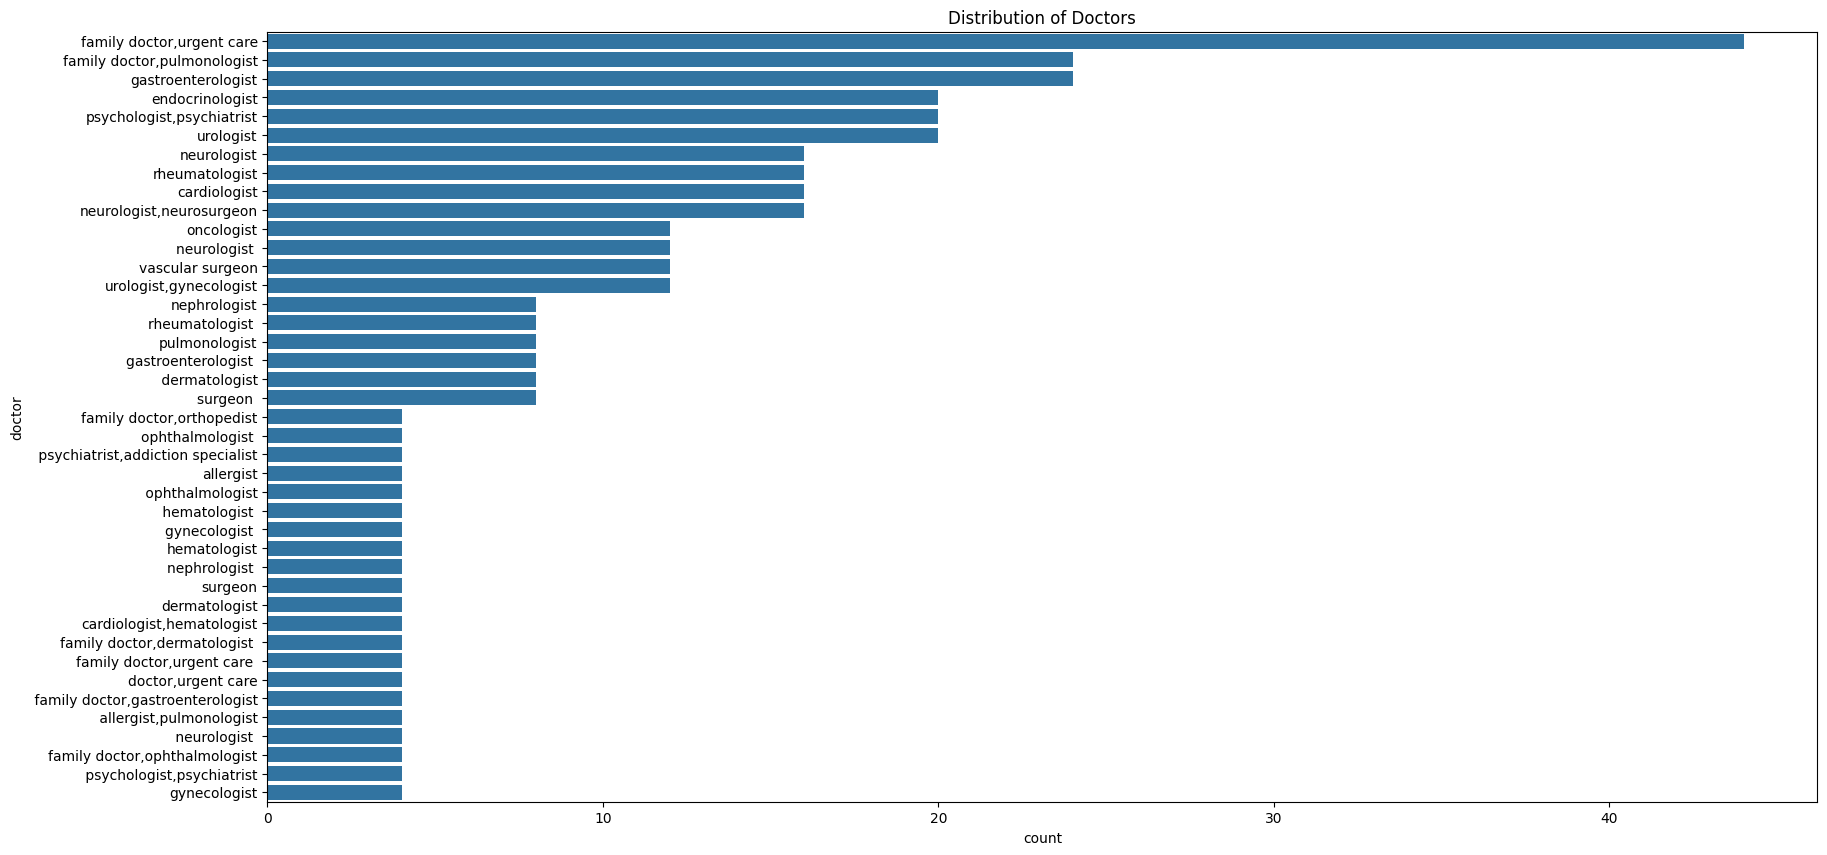

In [ ]:
# Plot the distribution of doctors
plt.figure(figsize=(20, 10))
sns.countplot(y=dataset['doctor'], order=dataset['doctor'].value_counts().index)
plt.title('Distribution of Doctors')
plt.show()

In [ ]:
# Step 4: Feature Engineering - Vectorize Symptoms
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['symptoms'])

In [ ]:
# The target variables (disease and doctor)
y_disease = dataset['disease']
y_doctor = dataset['doctor']

In [ ]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_disease_train, y_disease_test, y_doctor_train, y_doctor_test = train_test_split(
    X, y_disease, y_doctor, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the column transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), 'symptoms'),  # TF-IDF for text data (e.g., 'symptoms')
        ('onehot', OneHotEncoder(), 'category')    # One-hot encoding for categorical data (e.g., 'category')
    ]
)

# Example of using the preprocessor in a pipeline with a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Add your model here, e.g., ('classifier', RandomForestClassifier())
])

# Now you can use `pipeline.fit()` to train the model and `pipeline.predict()` to make predictions.


In [ ]:
# Using RandomForestClassifier for both disease and doctor prediction
disease_model = RandomForestClassifier(random_state=42)
doctor_model = RandomForestClassifier(random_state=42)

# Train the models
disease_model.fit(X_train, y_disease_train)
doctor_model.fit(X_train, y_doctor_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_disease_pred = disease_model.predict(X_test)
y_doctor_pred = doctor_model.predict(X_test)

In [ ]:
# Accuracy
disease_accuracy = accuracy_score(y_disease_test, y_disease_pred)
doctor_accuracy = accuracy_score(y_doctor_test, y_doctor_pred)


In [ ]:
# Output the accuracy
print(f"Disease prediction accuracy: {disease_accuracy * 100:.2f}%")
print(f"Doctor prediction accuracy: {doctor_accuracy * 100:.2f}%")


Disease prediction accuracy: 83.75%
Doctor prediction accuracy: 82.50%


In [ ]:

# Confusion Matrix
conf_matrix_disease = confusion_matrix(y_disease_test, y_disease_pred)
conf_matrix_doctor = confusion_matrix(y_doctor_test, y_doctor_pred)

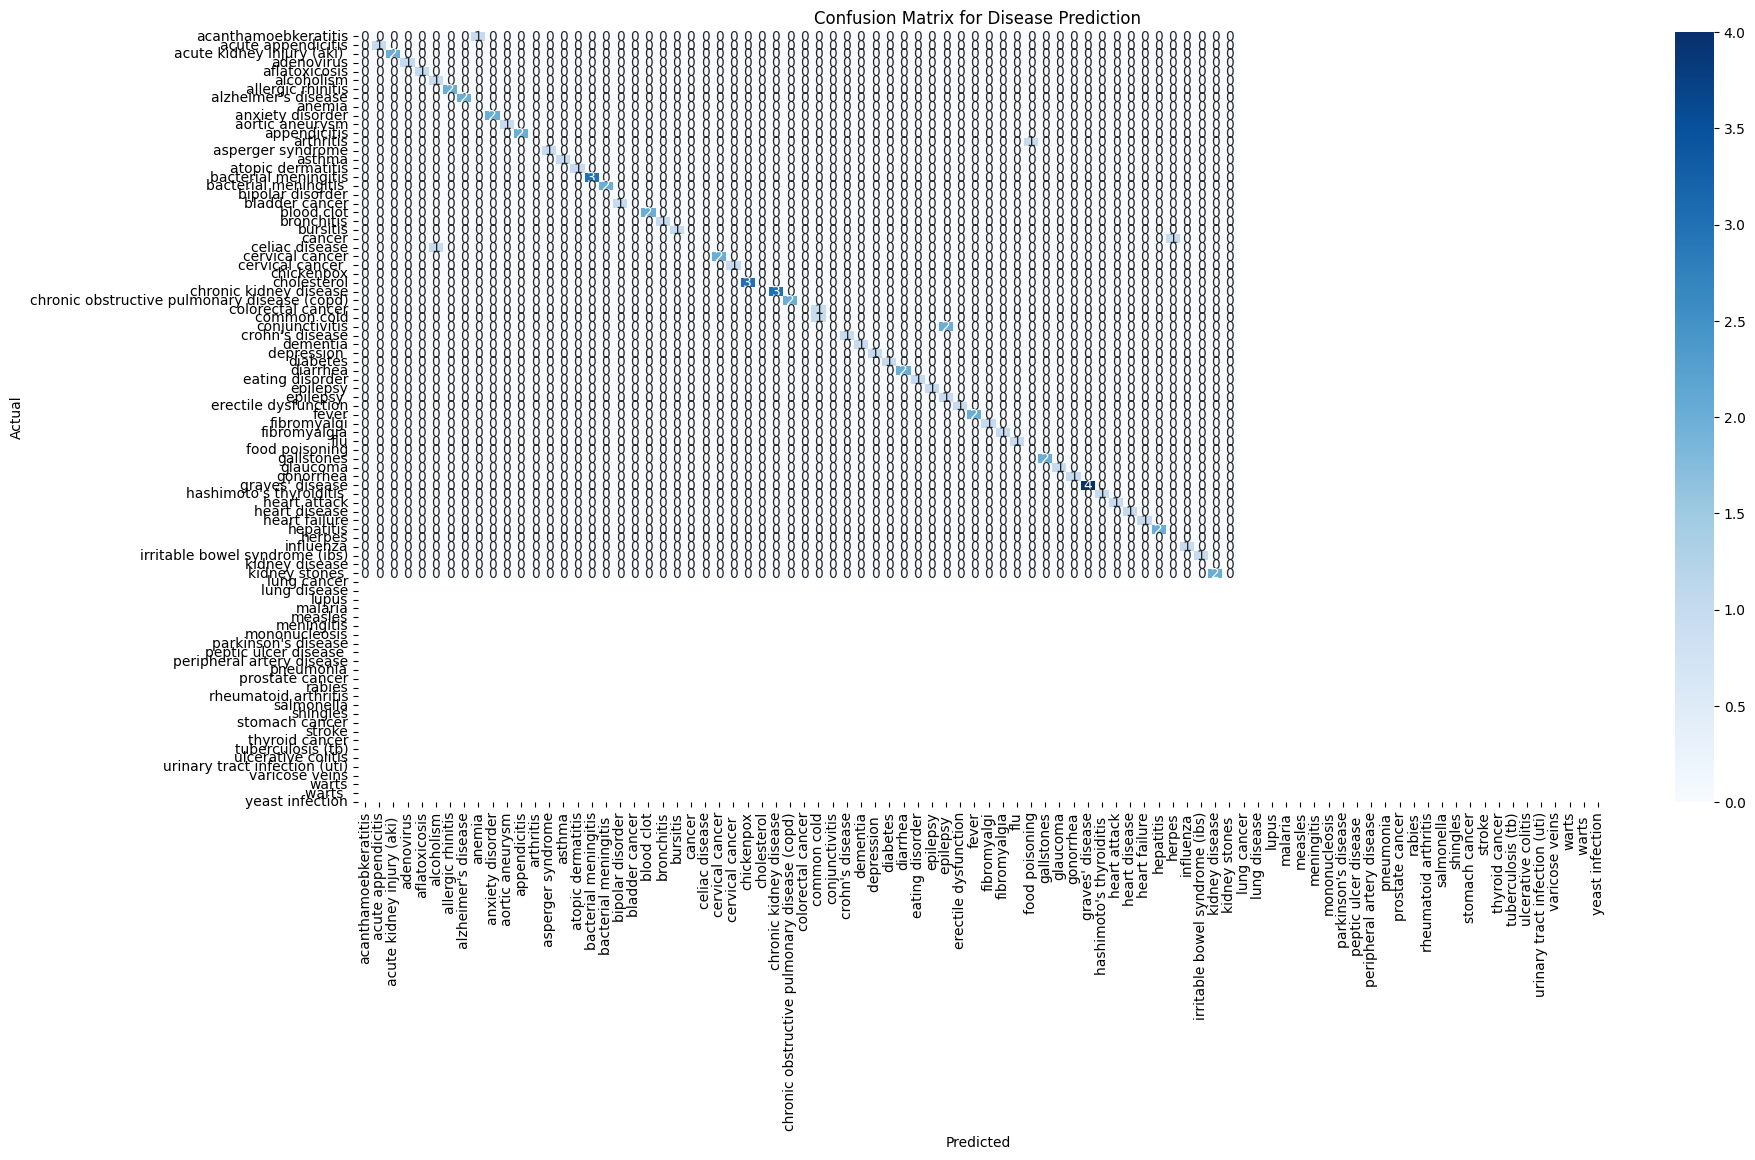

In [ ]:
# Plot confusion matrix for disease prediction
plt.figure(figsize=(20, 10))
sns.heatmap(conf_matrix_disease, annot=True, fmt='d', cmap='Blues',
            xticklabels=disease_model.classes_, yticklabels=disease_model.classes_)
plt.title('Confusion Matrix for Disease Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

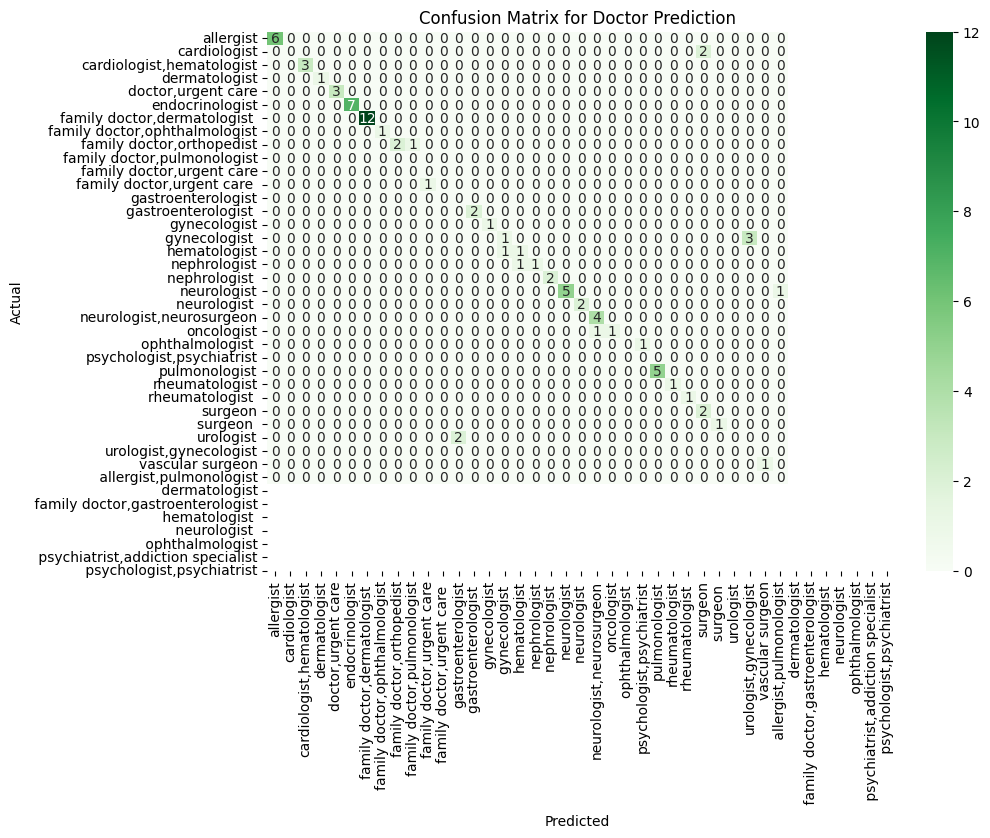

In [ ]:
# Plot confusion matrix for doctor prediction
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_doctor, annot=True, fmt='d', cmap='Greens',
            xticklabels=doctor_model.classes_, yticklabels=doctor_model.classes_)
plt.title('Confusion Matrix for Doctor Prediction')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import random
from nltk.corpus import wordnet

# Function for data augmentation using synonym replacement
def augment_data(symptom):
    words = symptom.split()
    augmented_symptoms = []

    for word in words:
        # Find synonyms using WordNet
        synonyms = wordnet.synsets(word)
        if synonyms:
            # Choose a random synonym if available
            synonym = random.choice(synonyms).lemmas()[0].name()
            augmented_symptom = symptom.replace(word, synonym)
            augmented_symptoms.append(augmented_symptom)

    return ' '.join(augmented_symptoms)

# Load the disease dataset
df = pd.read_csv('Disease11111.csv')  # Update with the correct path to your disease dataset

# Augment the dataset by creating additional symptom-disease pairs
augmented_data = []
for index, row in df.iterrows():
    original_symptom = row['symptoms']
    augmented_symptom = augment_data(original_symptom)
    augmented_data.append({'symptoms': augmented_symptom, 'disease': row['disease'], 'doctor': row['doctor'], 'cures': row['cures'], 'risk level': row['risk level']})

# Create a new DataFrame with the augmented data
augmented_df = pd.DataFrame(augmented_data)

# Combine original and augmented data
combined_df = pd.concat([df, augmented_df], ignore_index=True)


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Prepare the data by vectorizing the symptoms
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(combined_df['symptoms'])  # Fit and transform the symptoms
y = combined_df['disease']  # Target: Disease

# Initialize the Multilayer Perceptron (MLP) classifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(mlp_clf, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validated scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-validated scores: [0.89308176 0.88679245 0.82278481 0.82911392 0.82278481]
Mean accuracy: 85.09%


In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b6862eeef5a1901dad6a64204f6466df3757be796fdf6f4ef1973f353f6355f7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from joblib import dump, load
from lime.lime_text import LimeTextExplainer

# 1. Data Augmentation
def augment_data(df):
    augmented_rows = []
    for index, row in df.iterrows():
        symptoms = row['symptoms']
        augmented_rows.append({'symptoms': symptoms, 'disease': row['disease'], 'doctor': row['doctor'], 'cures': row['cures'], 'risk level': row['risk level']})
    augmented_df = pd.DataFrame(augmented_rows)
    return pd.concat([df, augmented_df], ignore_index=True)

# Load and augment the dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('Disease11111.csv')
df = augment_data(df)

# 2. Prepare the data by vectorizing the symptoms
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['symptoms'])
y = df['disease']

# 3. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Cross-validation with reduced splits to handle class imbalance warning
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
cv_scores = cross_val_score(mlp_clf, X_train, y_train, cv=3)  # Reduced to 3 splits
print(f"Cross-validated scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean() * 100:.2f}%")

# 5. Train the final model
mlp_clf.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = mlp_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Initialize LIME explainer for text data
explainer = LimeTextExplainer(class_names=mlp_clf.classes_)

# Define a wrapper function for LIME to work with text input
def predict_proba_for_lime(text):
    """Wrapper to predict probabilities from raw text using trained model and vectorizer."""
    text_vector = vectorizer.transform(text)
    return mlp_clf.predict_proba(text_vector)

# Function to predict disease, doctor, and cure based on symptoms input and show LIME explanation
def predict_disease(symptom_input):
    # Preprocess the input symptoms
    symptom_input = symptom_input.lower().strip()

    # Predict the disease
    symptom_vector = vectorizer.transform([symptom_input])
    predicted_disease = mlp_clf.predict(symptom_vector)[0]
    doctor = df.loc[df['disease'] == predicted_disease, 'doctor'].values[0] if predicted_disease in df['disease'].values else "Not available"
    cure = df.loc[df['disease'] == predicted_disease, 'cures'].values[0] if predicted_disease in df['disease'].values else "Not available"

    # Explain the prediction using LIME
    explanation = explainer.explain_instance(symptom_input, predict_proba_for_lime, num_features=5, labels=[list(mlp_clf.classes_).index(predicted_disease)])
    explanation.show_in_notebook(text=True)  # For Jupyter Notebook; for console use, you may use `print(explanation.as_list())`

    return {
        "Symptoms Entered": symptom_input,
        "Predicted Disease": predicted_disease,
        "Suggested Doctor": doctor,
        "Cure": cure
    }

# Get user input for symptoms
user_symptoms = input("Enter your symptoms: ")

# Predict the disease, doctor, and cure based on the user's symptoms, and show LIME explanation
prediction = predict_disease(user_symptoms)

# Output the prediction
print("\nPrediction based on your input:")
print(f"Symptoms Entered: {prediction['Symptoms Entered']}")
print(f"Predicted Disease: {prediction['Predicted Disease']}")
print(f"Suggested Doctor: {prediction['Suggested Doctor']}")
print(f"Cure: {prediction['Cure']}")

# Save the model and vectorizer
dump(mlp_clf, 'model.joblib')
dump(vectorizer, 'vectorizer.joblib')

# Load the model and vectorizer if needed later
mlp_clf = load('model.joblib')
vectorizer = load('vectorizer.joblib')



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Cross-validated scores: [0.90995261 0.90047393 0.90521327]
Mean accuracy: 90.52%
Model accuracy: 87.42%
Enter your symptoms: sweating,headache,runny nose,sneezing,sore throat



Prediction based on your input:
Symptoms Entered: sweating,headache,runny nose,sneezing,sore throat
Predicted Disease: common cold
Suggested Doctor: family doctor,urgent care
Cure: over-the-counter medications,rest,fluids
